## Problem statement

To build a machine learning model using Logistic Regression and predict whether a person is diabetic or not

## Dataset Information

### Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.


This dataset consists of nine columns
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Agenda 

1. Importing Libraries and dataset
2. Basic data exploration
3. Scaling of x_data Feature's
4. Train-Test Split
6. Logistic Regression(without using sklearn)
7. Logistic Regression using sklearn

## Import required Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
#df = pd.read_csv("diabetes_data.csv")
#df.head()

In [4]:
## If using google colab

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes_data.csv')
df.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore the data

In [5]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
## Lets check the statistical summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


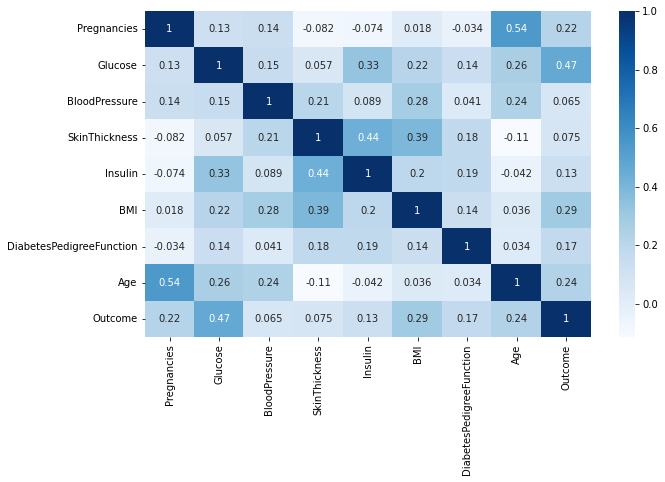

In [7]:
## lets visualize the correlation using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

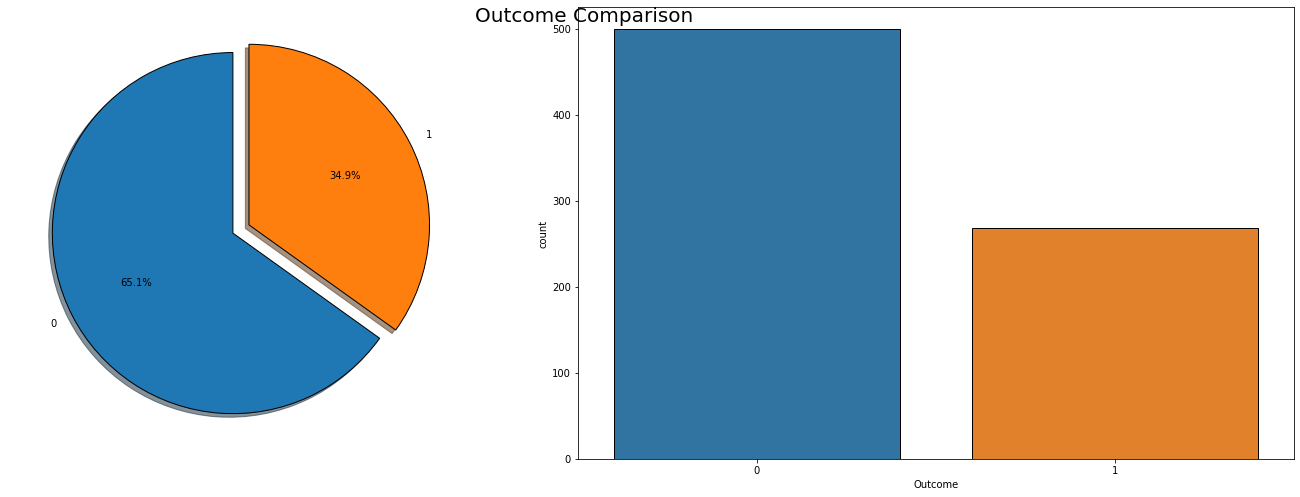

In [8]:
# Let's check whether the outcome is balanced or not
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
fig.suptitle('Outcome Comparison\n', fontsize=20)

ax1.pie(df.Outcome.value_counts().values, labels=df.Outcome.value_counts().index, startangle=90, explode=(0.0, 0.1), shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
sns.countplot(ax=ax2, data=df, x='Outcome', edgecolor='black')

plt.tight_layout()

## Logistic regression Without using sklearn library

#### `Sigmoid function:` S(x) = 1/1+e^-z

#### A = σ(M.T * x + C) (probabilitic predictions of shape (1 x m)) ### Here, M.T is the transpose of M

#### `Cost function:`  -1/m Σ [y log(a) + (1-y) log(1-a)]

#### `Gradient descent:`  To minimize the cost or error we will use gradient descent
- dM = ðcost/ðM = (A - Y) * X.T
- dC = ðcost/ðC = (A - Y)
- M = M - α * dM.T
- C = C - α * dC

### Split and Scale the data

In [9]:
## separate independent and target variable
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [10]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

## lets reshape the train and test data
## The need of reshaping the data is to match the shape while passing the data to the function
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])


print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(8, 537) (8, 231)
(1, 537) (1, 231)


### Defining Neccesary Functions

In [11]:
## Lets write a simple function for sigmoid
def sigmoid_function(x):
    return 1/(1 + np.exp(-x))

In [13]:
## lets write a function which uses gradient descent and minimizes the cost
def Log_reg_model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1] 
    n = X_train.shape[0]
    M = np.zeros((n,1))
    C = 0
    
    cost_list = []
    
    for i in range(iterations):
        Z = np.dot(M.T, X) + C
        A = sigmoid_function(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dM = (1/m)*np.dot(A-Y, X.T)
        dC = (1/m)*np.sum(A - Y)
        M = M - learning_rate*dM.T
        C = C - learning_rate*dC
        
        # appending cost values into a list
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return M, C, cost_list

In [14]:
iterations = 100000
learning_rate = 0.0015
M, C, cost_list = Log_reg_model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.49903932776624993
cost after  20000 iteration is :  0.49626872232254177
cost after  30000 iteration is :  0.49605855347788297
cost after  40000 iteration is :  0.496035426797144
cost after  50000 iteration is :  0.49603225535584705
cost after  60000 iteration is :  0.49603176041679625
cost after  70000 iteration is :  0.4960316778943932
cost after  80000 iteration is :  0.49603166370243124
cost after  90000 iteration is :  0.49603166122712367


In [16]:
## Lets write a function to check the accuracy of the model
def accuracy(X, Y, M, C):
    
    Z = np.dot(M.T, X) + C
    A = sigmoid_function(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    result = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(result, 2), "%")

In [17]:
accuracy(X_test, Y_test, M, C)

Accuracy of the model is :  80.52 %


# Logistic regression Using Sklearn library

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
## separate independent and target variable
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

## Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

(537, 8) (231, 8)
(537,) (231,)


In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [21]:
y_pred = log_reg.predict(X_test)

In [22]:
accuracy_score(Y_test,y_pred)

0.7316017316017316

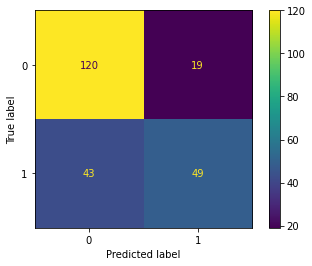

In [23]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, Y_test)  
plt.show()

In [24]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       139
           1       0.72      0.53      0.61        92

    accuracy                           0.73       231
   macro avg       0.73      0.70      0.70       231
weighted avg       0.73      0.73      0.72       231



----
## Happy Learning:)
----